##¿Deberíamos aprobar o no el préstamo?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_columns = 500


In [2]:
from google.colab import drive # Montamos una carpeta de un Google Drive donde está el dataset.
drive.mount('/content/drive', force_remount=True)

path = "/content/drive" + "/MyDrive" + "/Cursos/Coderhouse/Data Science/"


Mounted at /content/drive


##Introducción

**Contexto.** Este dataset es de la Administración de Pequeñas Empresas de EE.UU. (SBA). La SBA de EE. UU. se fundó en 1953 con el principio de promover y ayudar a las pequeñas empresas en el mercado crediticio de EE. UU. El dataset consta de una lista de préstamos donde figura la empresa que pidió el préstamo, el monto, el banco que hizo el préstamo, el balance de la empresa, si la empresa tuvo dificultades al pagar el préstamo o lo pagó completo, el sector al cual pertenece la empresa, etc.

**Problema empresarial.** Se quiere decidir si un préstamo puede ser otorgado con una probabilidad razonable de que la empresa que lo solicita pueda cancelarlo sin inconvenientes.

## Objetivo


Nuestro objetivo es implementar un modelo de machine learning de aprendizaje supervisado, que con los distintos valores de los campos del dataset, prediga si la empresa tuvo dificultades en pagar el préstamo o no, lo que nosotros para decirlo en forma más corta llamaremos, entrar en default. La columna que indica esto se llama MIS_Status y es la variable objetivo.

##Enfoque analítico##

El problema corresponde a un problema de clasificación. La categoría que se desea asignar a los préstamos futuros corresponde con la variable objetivo.

El caso está estructurado de la siguiente manera: 
(1) Realizaremos un análisis de datos exploratorio para identificar las variables más relevantes para predecir la variable objetivo y empezar a entender como influyen; 
(2) Con lo observado en la primera parte, se ajustará en trabajos posteriores el modelo de clasificación para resolver el problema.

## Exploración de datos

In [3]:
loan = pd.read_csv(path + "Should This Loan be Approved or Denied.csv", dtype={'ApprovalFY': str}) #La columna ApprovalFY se la fuerza a ser string porque en el dataset original dicha columna se la reconoce como con valores mixtos.

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

Las variables que encontramos:

**-LoanNr_ChkDgt**: Identificador-primary key

**-Nombre**: Nombre del prestatario

**-Ciudad**: Ciudad del prestatario

**-Estado**: Estado del prestatario

**-Código postal**: Código postal del prestatario

**-Banco**: Nombre del banco

-**BankState**: Estado del banco

-**NAICS**:  Codigo para clasificación de la industria de USA

**-ApprovalDate**: Fecha de emisión del compromiso emitido por SBA

**-ApprovalFY**: Fecha fiscal del compromiso

**-Term**: plazo del préstamo en meses

**-NoEmp**: Número de empleados de la empresa

**-NewExist**:1=Negocio existente, 2=Nuevo negocio

**-CreateJob**: número de puestos de trabajos creados

**-RetainedJob**: número de puestos de trabajo retenidos

**FranchiseCode**:Código de franquicia, (00000 o 00001)=Sin franquicia

**-Urbano Rural**: 1=Urbano, 2=rural, 0=indefinido

**-RevLineCr**: Linea de crédito renovable Y=Si, N=No

**-LowDoc**:Programa de préstamos LowDoc: Y=Si y N=No

**-ChgOffDate**: Fecha en que se declara que un préstamo está en mora

**-DisbursementDate**: Fecha de pago

**-DisbursementGross**: Monto desembolsado/pagado

**-BalanceGross**:Cantidad bruta pendiente

**-MIS_Status**: estado del préstamo cancelado = CHGOFF, pagado en su totalidad = PIF

**-ChgOffPrinGr**: Importe cancelado

**-GrAppv**: Monto bruto del préstamo aprobado por el banco

**-SBA_Appv**: Monto garantizado del préstamo aprobado por la SBA

In [5]:
loan.describe(include = 'all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LoanNr_ChkDgt,899164.0,NaN,NaN,NaN,4772612310.59431,2538175037.45304,1000014003.0,2589757508.5,4361439006.0,6904626504.75,9996003010.0
Name,899150,779583,SUBWAY,1269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,899134,32581,LOS ANGELES,11558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,899150,51,CA,130619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip,899164.0,NaN,NaN,NaN,53804.391241,31184.159152,0.0,27587.0,55410.0,83704.0,99999.0
Bank,897605,5802,BANK OF AMERICA NATL ASSOC,86853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BankState,897598,56,CA,118116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAICS,899164.0,NaN,NaN,NaN,398660.950146,263318.31276,0.0,235210.0,445310.0,561730.0,928120.0
ApprovalDate,899164,9859,7-Jul-93,1131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApprovalFY,899164,52,2005,77525,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loan.head(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,120,19,1.0,0,0,1,0,N,N,NaN,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,45,45,2.0,0,0,0,0,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,84,1,2.0,0,0,1,0,N,Y,NaN,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,297,2,2.0,0,0,1,0,N,N,NaN,31-Jul-97,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,84,3,2.0,0,0,1,0,N,Y,NaN,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


Hay varias columnas que tienen valores monetarios y donde los números están en formato que no se los reconoce como números. Para trabajar esos datos conviene formatearlos a datos numéricos. 

In [7]:
loan[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']] = (loan[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']]).replace({"[\$]": "", "[,]": ""}, regex=True) 



In [8]:
loan['DisbursementGross'] = loan['DisbursementGross'].astype('float') #Si quiero pasar a float más de una columna, devuelve error.
loan['BalanceGross'] = loan['BalanceGross'].astype('float')
loan['GrAppv'] = loan['GrAppv'].astype('float')
loan['SBA_Appv'] = loan['SBA_Appv'].astype('float')

In [9]:
loan['Sector'] = (loan['NAICS'].astype(str).str[:2])#El comando str[:2] extrae los primeros dos dígitos, pero tiene que ser de un string, por eso ponemos antes .astype(str). 

Sería útil ver las estadísticas de estas columnas en forma numérica, así que volvemos a pedir una descripción.

In [10]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
LoanNr_ChkDgt,899164.0,4.772612e+09,2.538175e+09,1.000014e+09,2.589758e+09,4.361439e+09,6.904627e+09,9.996003e+09
Zip,899164.0,5.380439e+04,3.118416e+04,0.000000e+00,2.758700e+04,5.541000e+04,8.370400e+04,9.999900e+04
NAICS,899164.0,3.986610e+05,2.633183e+05,0.000000e+00,2.352100e+05,4.453100e+05,5.617300e+05,9.281200e+05
Term,899164.0,1.107731e+02,7.885731e+01,0.000000e+00,6.000000e+01,8.400000e+01,1.200000e+02,5.690000e+02
NoEmp,899164.0,1.141135e+01,7.410820e+01,0.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,9.999000e+03
NewExist,899028.0,1.280404e+00,4.517500e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
CreateJob,899164.0,8.430376e+00,2.366882e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.800000e+03
RetainedJob,899164.0,1.079726e+01,2.371206e+02,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,9.500000e+03
FranchiseCode,899164.0,2.753726e+03,1.275802e+04,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999900e+04
UrbanRural,899164.0,7.577483e-01,6.464360e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


Sería interesante ver si la distribución de los montos de los préstamos que entraron en default es distinta a la distribución de los montos de los que no entraron en default.

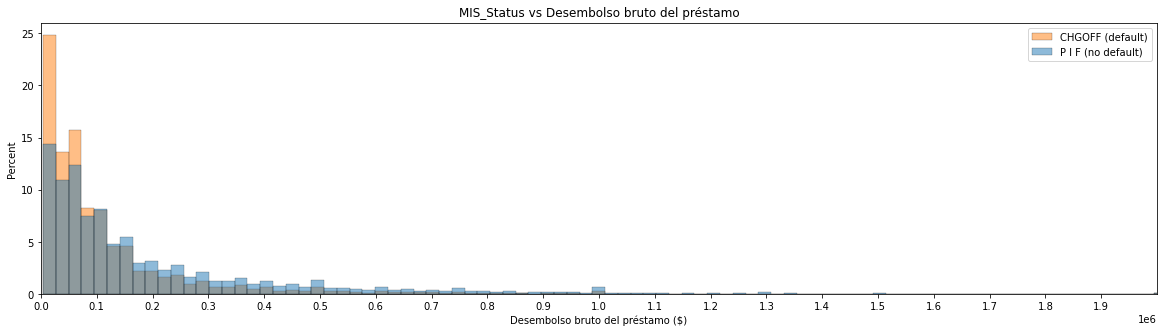

In [11]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.histplot(x= 'DisbursementGross', hue = 'MIS_Status',  data = loan, ax=ax,bins=500,stat='percent', common_norm=False) #Common_norm = False es para que haga los porcentajes por separado.             ) 
ax.set(xlabel='Desembolso bruto del préstamo ($)', ylabel='Percent')
plt.title("MIS_Status vs Desembolso bruto del préstamo")
plt.legend(labels=['CHGOFF (default)', 'P I F (no default)'])
ax.set_xlim(0, 2e6) #Debido a la existencia de datos extremos, el gráfico se ve chico. Cambiemos el rango así lo vemos más en detalle.
ax.set(xticks=np.arange(0, 2e6, 1e5));

Recordemos que los entrados en default o que tuvieron problemas son los catalogados como 'CHGOFF', y los que no tuvieron problemas son los catalogados como 'P I F' (paid in full).<br>
El porcentaje se refiere con respecto a cada total. Por ejemplo, en el primer rango (primera barra) se produjo el 25 % de todos los defaults y un poco menos del 15% de todos los pagados en término.<br>
Vemos entonces que el gráfico nos dice que la mayoría de los préstamos entrados en default se encuentran en el rango de entre 0 y 100000 Uss.

Miremos los boxplots de los desembolsos brutos con respecto a los préstamos en término y los que fueron a default.

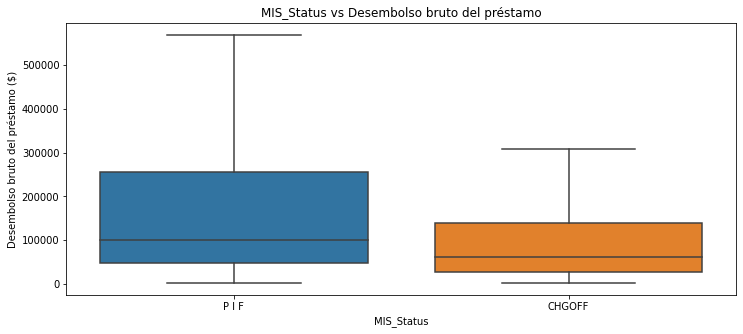

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='MIS_Status', y = 'DisbursementGross', data = loan, showfliers = False)  ## La existencia de outliers hace que no se vea muy bien el gráfico. Por eso los eliminamos, con showfliers = False
plt.title("MIS_Status vs Desembolso bruto del préstamo");
ax.set(xlabel='MIS_Status', ylabel='Desembolso bruto del préstamo ($)');

Este gráfico nos muestra que los préstamos que no tuvieron problemas tendieron a ser más grandes, confirmando lo que habíamos visto antes. Una hipótesis que podría explicar esto es que los mayores préstamos están asociados a compañías establecidas y en expansión, en una compañía así un préstamo es más probable de ser pagado sin problemas.

Esta última hipótesis podemos analizarla mejor mirando las columnas NewExist y NoEmp. La primera vale 1 si el negocio es anterior al préstamo y 2 si es un nuevo negocio; la segunda es el número de empleados.

Analicemos los porcentajes de los valores de MIS_Status según si es nuevo el negocio o no.

In [13]:
loan[loan['NewExist']==2]['MIS_Status'].value_counts(normalize=True)

P I F     0.812452
CHGOFF    0.187548
Name: MIS_Status, dtype: float64

In [14]:
loan[loan['NewExist']==1]['MIS_Status'].value_counts(normalize=True)

P I F     0.828868
CHGOFF    0.171132
Name: MIS_Status, dtype: float64

Gráficamente:

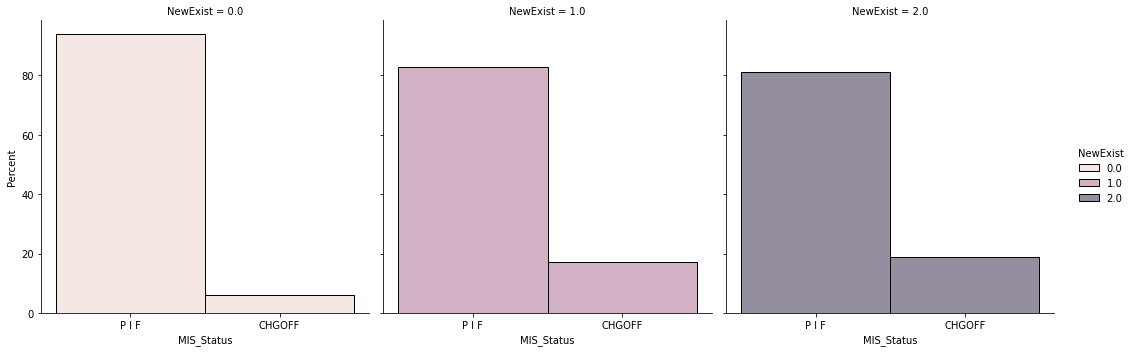

In [15]:
sns.displot(data=loan, x="MIS_Status", col="NewExist", hue="NewExist", stat='percent', common_norm=False);


Vemos que no hay mucha diferencia en los porcentajes de default entre las empresas nuevas y las ya existentes. Lo que parece descartar parte de la anterior conjetura.<br> 

Por otro lado, vemos que también el parámetro NewExist tiene valores 0, lo que asociamos a que dicho parámetro está no completado. ¿Cuántos valores 0 hay en dicha columna?

In [16]:
loan[loan['NewExist']==0].shape[0] #shape[0] devuelve el número de filas, es decir, la cantidad de registros donde NewExist es igual a 0.

1034

Este es un número pequeño con respecto al total.

Veamos ahora que sucede con relación al número de empleados. 

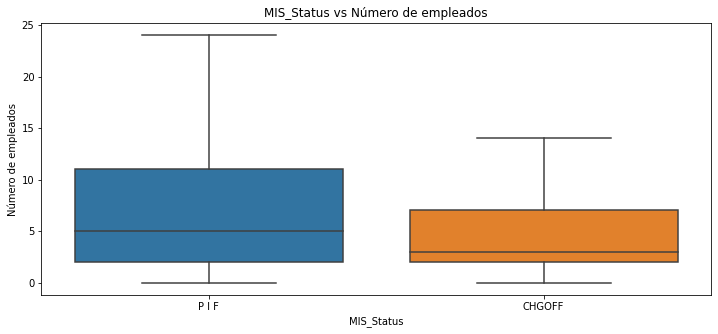

In [17]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='MIS_Status', y = 'NoEmp', data = loan,  showfliers = False)  
plt.title("MIS_Status vs Número de empleados");
ax.set(xlabel='MIS_Status', ylabel='Número de empleados');

Vemos que, sacando outliers, efectivamente las empresas que no presentaron problemas al pagar tienen más empleados. Esto nos dice que el número que cuanto mayor es el número de empleados, más probable es el pago sin problema.

Combinemos el monto bruto desembolsado con el número de empleados y si hubo problemas al pagar el préstamo. Vamos a hacer el gŕafico con un máximo 30 empleados para que sea entendible.

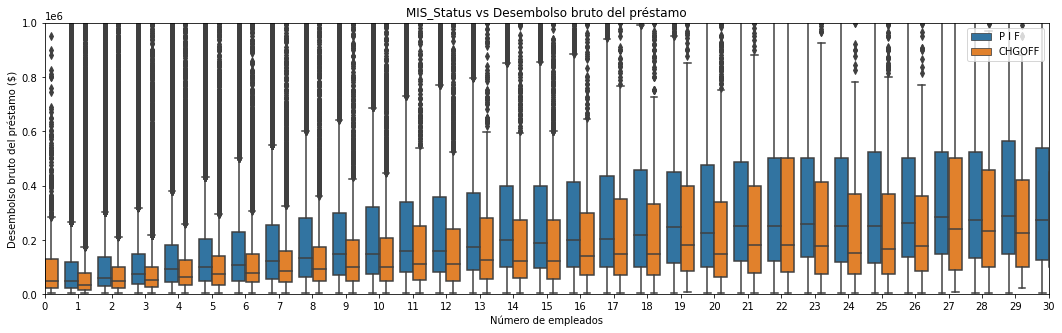

In [18]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='NoEmp', hue='MIS_Status', y = 'DisbursementGross', data = loan)  ## BalanceGross=monto desembolsado----- DisbursementGross
plt.title("MIS_Status vs Desembolso bruto del préstamo");
ax.set(xlabel='Número de empleados', ylabel='Desembolso bruto del préstamo ($)')
ax.set_xlim(0,30)
ax.set_ylim(0,1e6)
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.0))

Vemos que, en general, a número de empleados fijo, los préstamos más grandes tienden a entrar menos en default. Concluimos entonces que la razón de que los préstamos más grandes tienen menos probabilidad de entrar en default no es explicada únicamente por el número de empleados o porque la empresa fuese nueva o no. Debería haber otra explicación.

Analicemos ahora si hay sectores con más tendencia a tener problemas en los pagos.

In [19]:
loan['MIS_Status_numeric'] = loan['MIS_Status']=='CHGOFF'#Por comodidad, creo una columna nueva que vale True si entro en Default, y False si no.

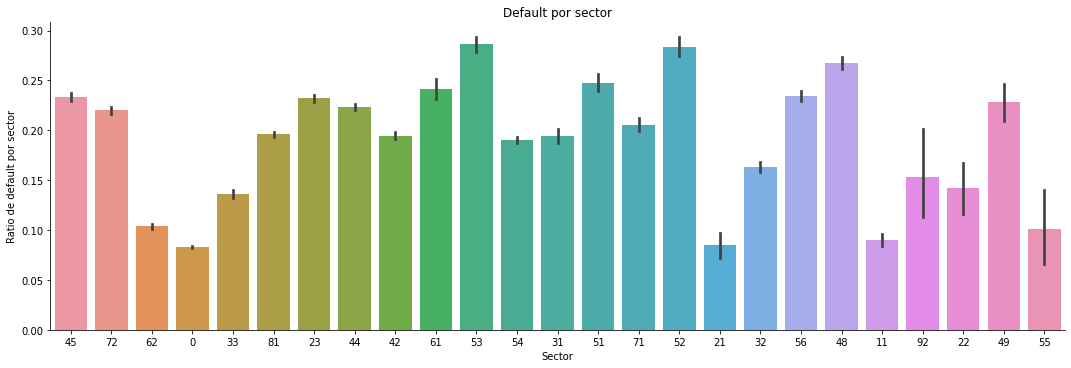

In [20]:
sns.catplot( data=loan, x="Sector", y="MIS_Status_numeric", kind="bar", aspect=3); #En el eje y grafica un promedio de MIS_Status_numeric. 
#Al ser booleano, transforma True en 1 y el promedio corresponde al porcentaje de defaults en cada sector.
plt.ylabel('Ratio de default por sector');
plt.title("Default por sector");


(Las líneas sobre las barras indican un intervalo de confianza de la media del 95% suponiendo que el sampleo es aleatorio).

Para entender esto mejor, veamos la tabla con los códigos de sectores.

|Sector |	Description|
|-------|----------------|
11 | Agriculture, forestry, fishing and hunting
21 |	Mining, quarrying, and oil and gas extraction
22 |	Utilities
23 |	Construction
31–33 |	Manufacturing
42 |	Wholesale trade
44–45 |	Retail trade
48–49 |	Transportation and warehousing
51 |	Information
52 |	Finance and insurance
53 |	Real estate and rental and leasing
54 |	Professional, scientific, and technical services
55 |	Management of companies and enterprises
56 |	Administrative and support and waste management and remediation services
61 |	Educational services
62 |	Health care and social assistance
71 |	Arts, entertainment, and recreation
72 |	Accommodation and food services
81 |	Other services (except public administration)
92 |  Public administration

Vemos que hay sectores como el 52 y 53 ("Finance and insurance"
y	"Real estate and rental and leasing", respectivamente) donde el porcentaje de default es cercano al 30%, mientras que otros sectores como el 11 y el 21 ("Agriculture, forestry, fishing and hunting" y "Mining, quarrying, and oil and gas extraction", respectivamente) donde el porcentaje es menor al 10%. 